In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'365']

In [6]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['NO2']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=6)

In [8]:
forest = RandomForestRegressor(n_estimators=2500,
                              max_depth=9,
                              max_features='sqrt',
                              min_samples_split=2,
                              min_samples_leaf=2,random_state=42)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=9, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=2500, random_state=42)

In [9]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.8735195764125392

Score on test data: 0.7598108846923624

Root Mean Squared Error: 13.213018417332448

Overall model accuracy: 0.7598108846923624


In [10]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [11]:
predict=forest.predict(X)

In [12]:
predict

array([55.83630458, 55.1183694 , 54.3642233 , 56.62094709, 57.20640579,
       57.11874894, 56.14138337, 59.81909359, 60.19580358, 58.20105954,
       56.6349292 , 54.17242165, 57.48455078, 58.02526801, 56.14787177,
       55.61306342, 56.80424002, 56.54733319, 55.20721215, 55.37706448,
       52.51524016, 51.02055046, 50.01439548, 49.70399291, 49.95559769,
       42.14862496, 43.27624625, 42.08087302, 41.56367769, 39.70122541,
       39.51575872, 39.49760078, 39.65748429, 39.92717613, 38.41345383,
       40.43659581, 41.24759894, 41.01739786, 41.65971749, 44.86009538,
       45.77079834, 43.83811207, 39.82859299, 40.16060159, 39.82398287,
       36.40205397, 36.72827154, 39.75704453, 40.48117437, 37.73624362,
       36.19415935, 55.04961354])

In [13]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [14]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [15]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [16]:
X['pred']=predict

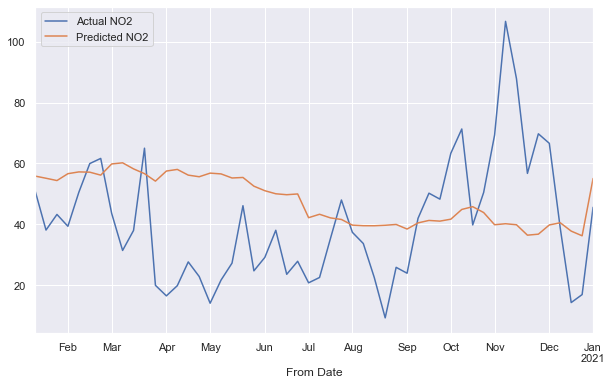

In [17]:
test['NO2'].plot(legend=True, label='Actual NO2', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO2')
plt.style.use('seaborn-white')

In [18]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 10.575388187636445
MSE: 174.58385569676645
RMSE: 13.213018417332448
R-Squared: 0.7598108846923624


In [19]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 56.42275655336168
MSE: 7773.882192280831
RMSE: 88.169621708845
R-Squared: -0.3093299599811099


In [20]:
pred=X.loc["2020-03-25":"2020-04-14",'pred']

In [21]:
pred.median()

57.48455077579768

In [22]:
ytest.std()

27.144372651659957

In [23]:
pred1=X.loc["2020-04-15":"2020-05-17",'pred']
pred2=X.loc["2020-08-01":"2020-11-30",'pred']
pred3=X.loc["2020-01-30":"2020-03-22",'pred']

In [24]:
pred2.median()

39.87788456134158

# 3rd plot

In [25]:
testcase = pd.DataFrame()

In [26]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [27]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [28]:
testcase

,test,pred,Corrected
365,31.524286,53.884415,40.671396
116,67.222857,75.923316,62.710297
61,71.982857,89.197086,75.984067
325,75.190000,64.326284,77.539303
100,112.948571,101.341283,114.554301
...,...,...,...
249,72.955714,77.040727,63.827708
351,23.905714,41.430330,28.217312
27,54.015714,55.396079,42.183061
19,97.027143,78.534288,91.747307


In [29]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [30]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.909313599914416

In [31]:
test2020=pd.DataFrame()

In [32]:
test2020['test']=test['NO2']
test2020['pred']=X['pred']

In [33]:
test2020.index=test.index

In [34]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

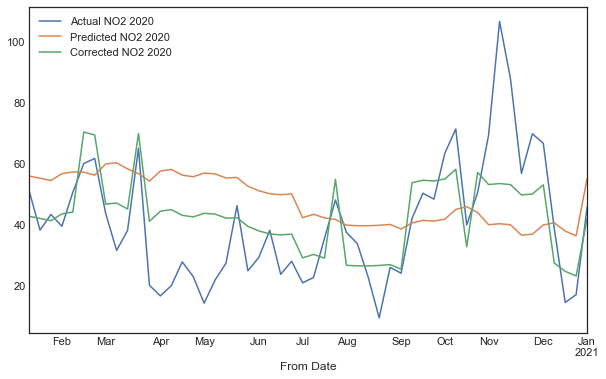

In [35]:
test2020['test'].plot(legend=True, label='Actual NO2 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO2 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NO2 2020')

In [36]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

-0.6020961723449465

In [37]:
ytest.std()

27.144372651659957

In [38]:
test2020['test'].std()

20.133090817793285